## **Task:1 - Data Preparation**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as skl

In [35]:
df=pd.read_csv('/content/Telco_Customer_Churn_Dataset  (3).csv')

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Convert categorical variables into numerical representations :


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **## Task:2 - Exploratory Data Analysis**

In [40]:
import matplotlib.pyplot as plt
import seaborn as sb

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


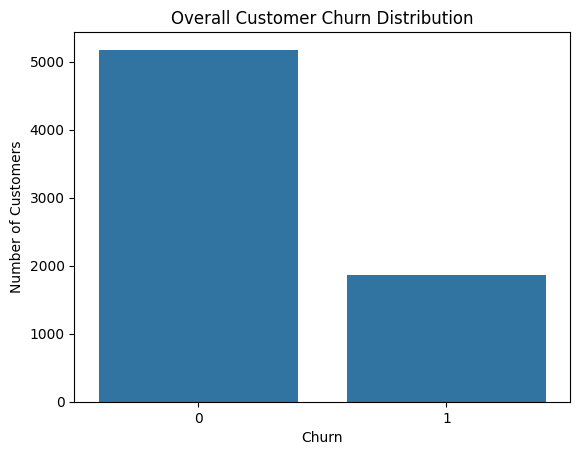

In [41]:
sb.countplot(x='Churn', data=df)
plt.title("Overall Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

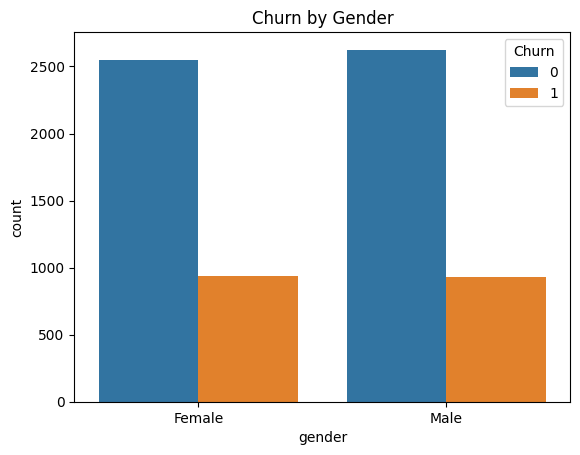

In [42]:
sb.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()

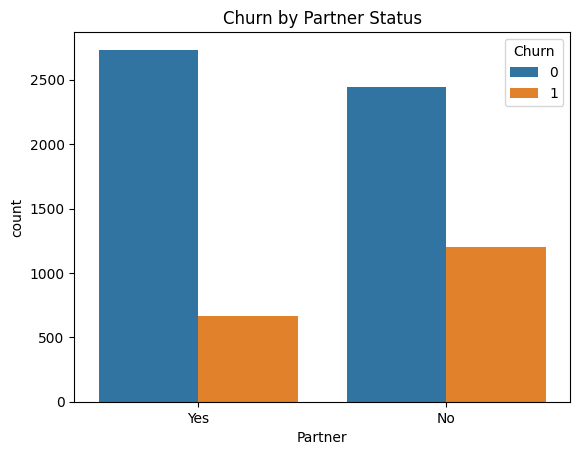

In [43]:
sb.countplot(x='Partner', hue='Churn', data=df)
plt.title("Churn by Partner Status")
plt.show()

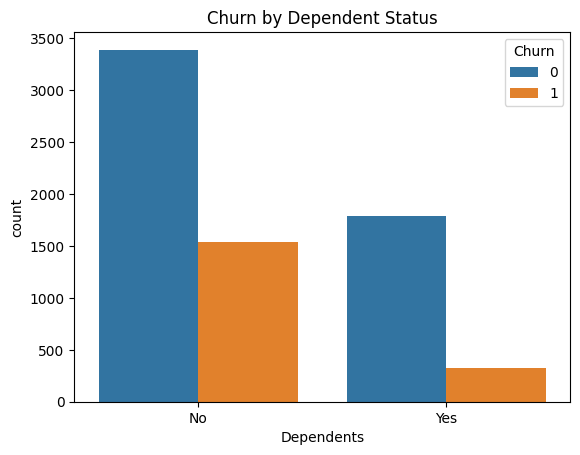

In [44]:
sb.countplot(x='Dependents', hue='Churn', data=df)
plt.title("Churn by Dependent Status")
plt.show()

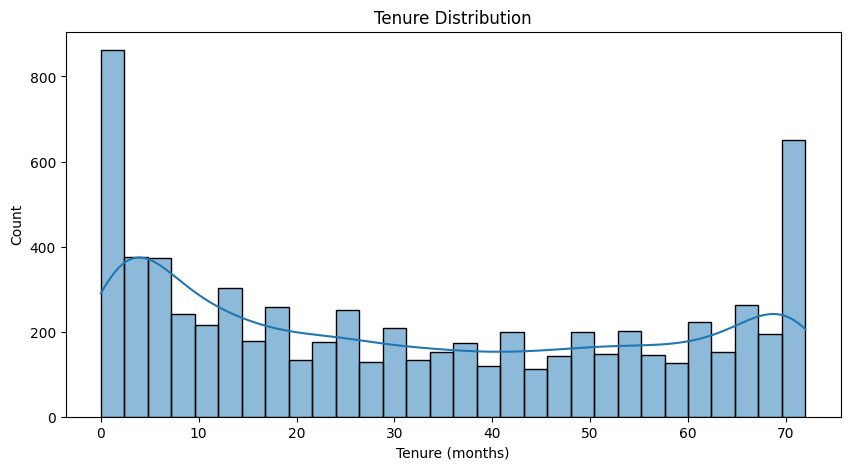

In [45]:
plt.figure(figsize=(10,5))
sb.histplot(df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.show()

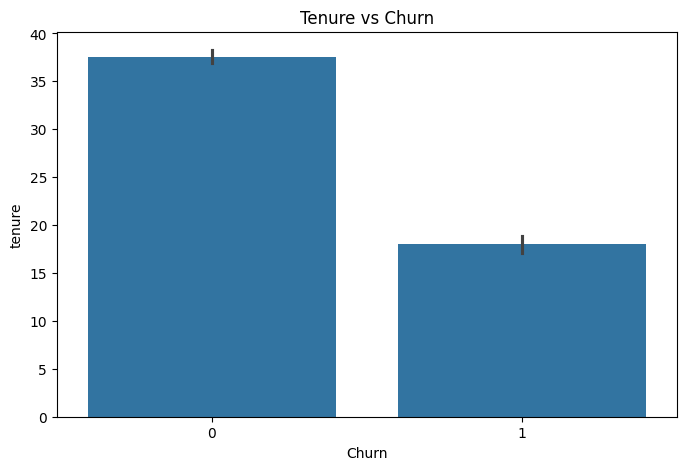

In [46]:
plt.figure(figsize=(8,5))
sb.barplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

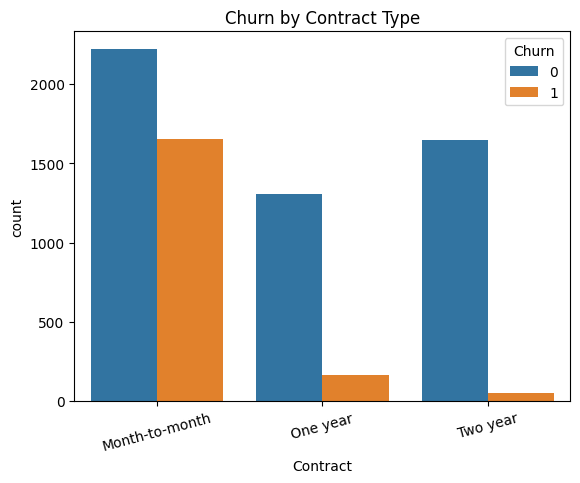

In [47]:
sb.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()

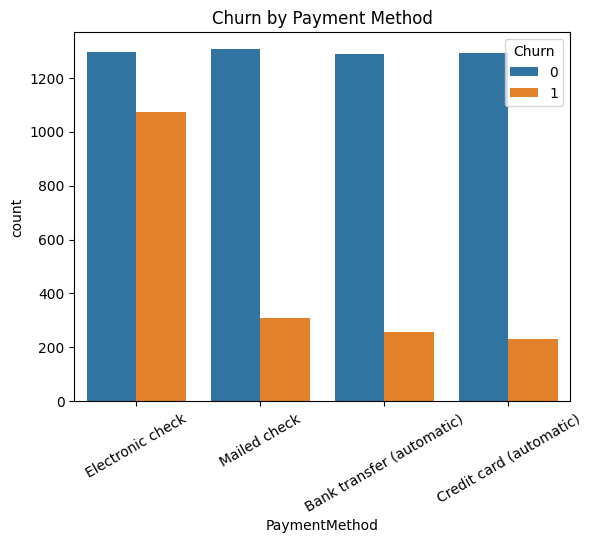

In [48]:
sb.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()

In [49]:
def tenure_segment(t):
    if t <= 12:
        return "New"
    elif t <= 36:
        return "Mid-term"
    else:
        return "Long-term"

df['TenureSegment'] = df['tenure'].apply(tenure_segment)


def charge_segment(c):
    if c < 35:
        return "Low Charges"
    elif c < 70:
        return "Medium Charges"
    else:
        return "High Charges"

df['ChargeSegment'] = df['MonthlyCharges'].apply(charge_segment)


df['ContractSegment'] = df['Contract']

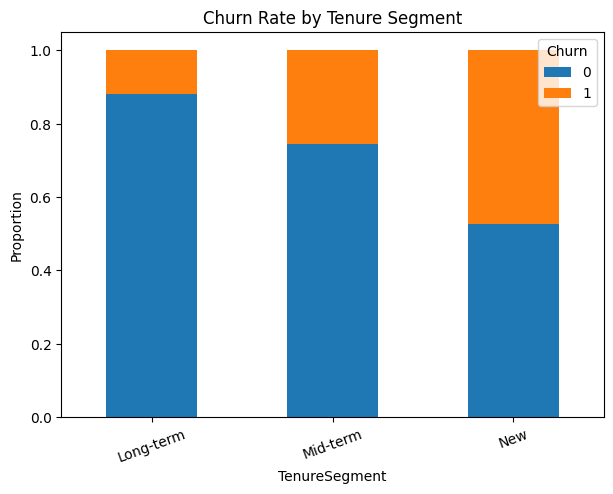

In [50]:
tenure_churn = df.groupby('TenureSegment')['Churn'].value_counts(normalize=True).unstack()
tenure_churn.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Churn Rate by Tenure Segment")
plt.ylabel("Proportion")
plt.xticks(rotation=20)
plt.show()

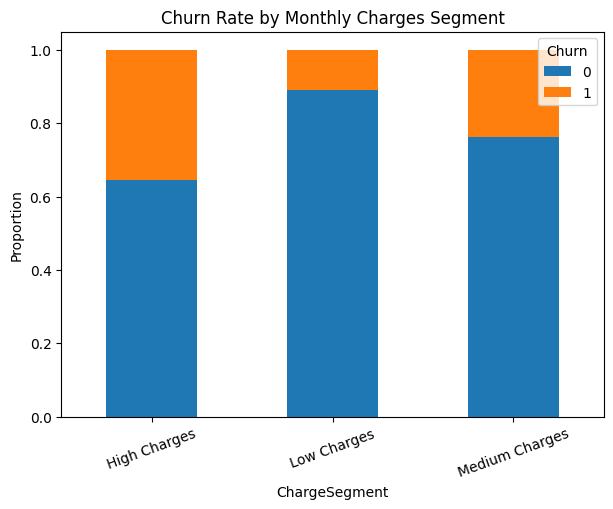

In [51]:
charge_churn = df.groupby('ChargeSegment')['Churn'].value_counts(normalize=True).unstack()
charge_churn.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Churn Rate by Monthly Charges Segment")
plt.ylabel("Proportion")
plt.xticks(rotation=20)
plt.show()

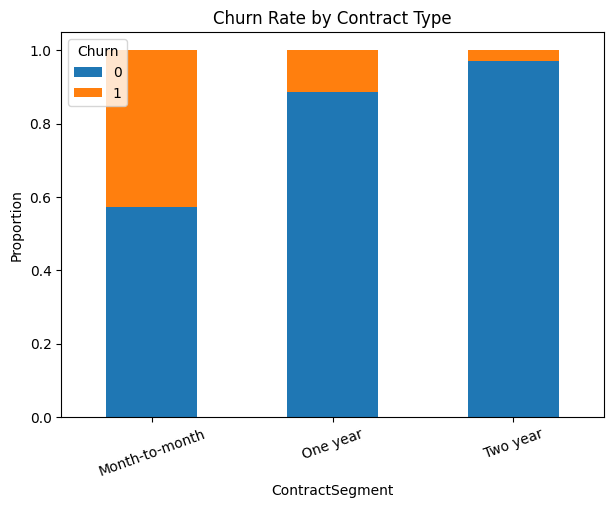

In [52]:
contract_churn = df.groupby('ContractSegment')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.xticks(rotation=20)
plt.show()

In [53]:
high_value_at_risk = df[
    (df['ChargeSegment'] == 'High Charges') &
    (df['TenureSegment'].isin(['Mid-term', 'Long-term'])) &
    (df['Churn'] == 1)
]

high_value_at_risk.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureSegment,ChargeSegment,ContractSegment
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Mid-term,High Charges,Month-to-month
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,Long-term,High Charges,Month-to-month
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,1,Long-term,High Charges,Month-to-month
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,1,Mid-term,High Charges,Month-to-month
51,9420-LOJKX,Female,0,No,No,15,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Credit card (automatic),99.10,1426.4,1,Mid-term,High Charges,Month-to-month


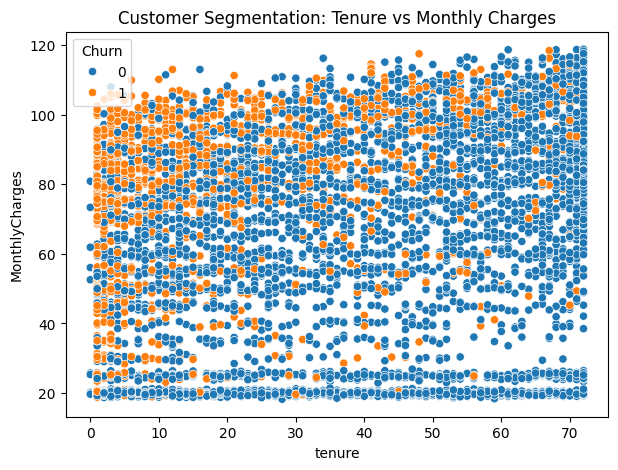

In [54]:
plt.figure(figsize=(7,5))
sb.scatterplot(
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    data=df
)
plt.title("Customer Segmentation: Tenure vs Monthly Charges")
plt.show()

# *Task 4 :- *Churn Prediction Model**

In [55]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [56]:
X = pd.get_dummies(X, drop_first=True)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

Accuracy: 0.7828246983676366
Precision: 0.6491228070175439
Recall: 0.39572192513368987
F1-score: 0.49169435215946844


In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [61]:
y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))


Accuracy: 0.7643718949609652
Precision: 0.5648148148148148
Recall: 0.4893048128342246
F1-score: 0.5243553008595988


In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


Accuracy: 0.7970191625266146
Precision: 0.6654135338345865
Recall: 0.4732620320855615
F1-score: 0.553125


In [64]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.782825,0.649123,0.395722,0.491694
1,Decision Tree,0.764372,0.564815,0.489305,0.524355
2,Random Forest,0.797019,0.665414,0.473262,0.553125


In [65]:
feature_importance = pd.Series(
    lr.coef_[0], index=X.columns
).sort_values(key=abs, ascending=False)

feature_importance.head(10)


,0
InternetService_Fiber optic,1.783584
TenureSegment_Mid-term,-1.431114
Contract_Two year,-1.190824
ContractSegment_Two year,-1.190824
TenureSegment_New,-1.156630
TotalCharges_20.15,0.883117
TotalCharges_19.9,0.879910
ChargeSegment_Medium Charges,0.788563
TotalCharges_20.5,0.715461
TotalCharges_20.2,0.676473


In [66]:
rf_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

rf_importance.head(10)


,0
tenure,0.072919
MonthlyCharges,0.059346
TenureSegment_New,0.025999
PaymentMethod_Electronic check,0.021891
InternetService_Fiber optic,0.020683
TechSupport_Yes,0.017987
Contract_Two year,0.017551
OnlineSecurity_Yes,0.016608
ContractSegment_Two year,0.015731
PaperlessBilling_Yes,0.013626


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=5
)

grid.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
best_rf = grid.best_estimator_


In [ ]:
y_pred_best = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))


Accuracy: 0.7970191625266146
Precision: 0.6654135338345865
Recall: 0.4732620320855615
F1-score: 0.553125


**Task:5** - **Model Evaluation and Interpretation**

In [ ]:
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


Accuracy : 0.7970191625266146
Precision: 0.6654135338345865
Recall   : 0.4732620320855615
F1-score : 0.553125


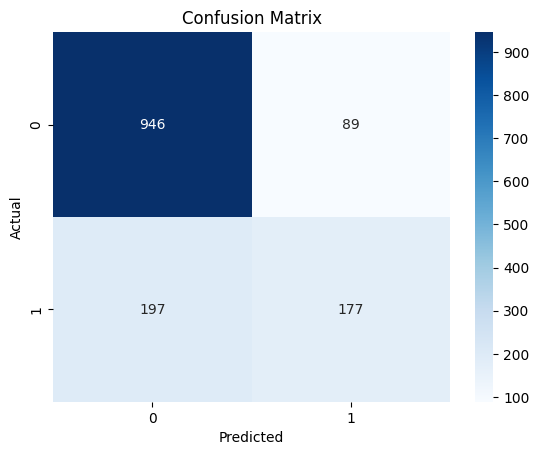

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


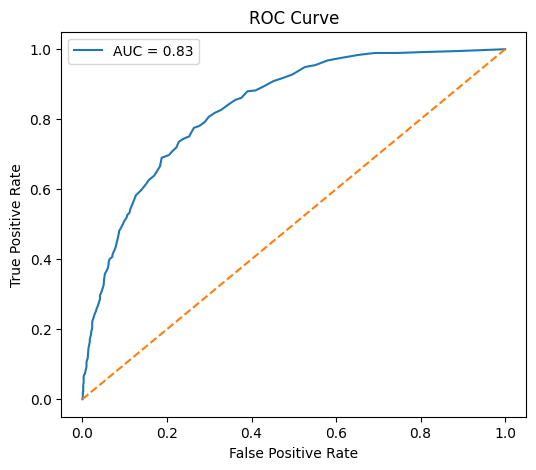

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Model** **Interpretation**

In [ ]:
import pandas as pd

feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
tenure,0.072919
MonthlyCharges,0.059346
TenureSegment_New,0.025999
PaymentMethod_Electronic check,0.021891
InternetService_Fiber optic,0.020683
TechSupport_Yes,0.017987
Contract_Two year,0.017551
OnlineSecurity_Yes,0.016608
ContractSegment_Two year,0.015731
PaperlessBilling_Yes,0.013626


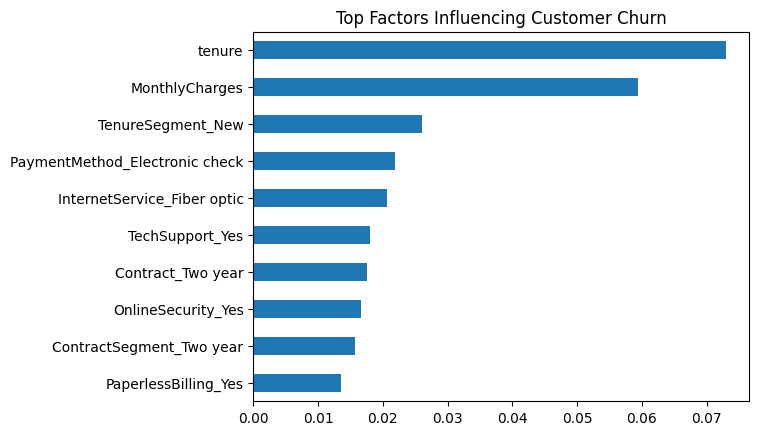

In [ ]:
feature_importance.head(10).plot(kind='barh')
plt.title("Top Factors Influencing Customer Churn")
plt.gca().invert_yaxis()
plt.show()


**The final churn prediction model was evaluated using the testing dataset to ensure generalization. Performance metrics such as recall, F1-score, and ROC–AUC were prioritized due to the business cost of missing churners. The model demonstrated strong predictive capability with a high ROC–AUC score. Feature importance analysis revealed that contract type, tenure, monthly charges, and payment method are the most influential factors driving customer churn. These insights enable targeted retention strategies for high-risk customers.**

To predict Customer Churn on new Data

In [30]:
new_customer = {
    "gender": "Male",
    "SeniorCitizen": 0,
    "Partner": "No",
    "Dependents": "No",
    "tenure": 5,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 89.5,
    "TotalCharges": 450.3
}


In [31]:
import pandas as pd

new_df = pd.DataFrame([new_customer])
new_df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,5,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.5,450.3


In [32]:
new_df_encoded = pd.get_dummies(new_df)

# Align columns with training features
new_df_encoded = new_df_encoded.reindex(
    columns=X_train.columns,
    fill_value=0
)


In [33]:
churn_prediction = best_rf.predict(new_df_encoded)


NameError: name 'best_rf' is not defined

In [ ]:
churn_probability = best_rf.predict_proba(new_df_encoded)[:, 1]


In [ ]:
churn_percentage = churn_probability[0] * 100


In [ ]:
if churn_probability > 0.5:
    print(f"⚠️ Customer is likely to churn")
else:
    print(f"✅ Customer is unlikely to churn")

print(f"Churn Probability: {churn_percentage:.2f}%")


⚠️ Customer is likely to churn
Churn Probability: 68.00%


**Thus we have predicted that if a new customer is likely to churn or not . The churn probability for new customers is expressed as a percentage to improve interpretability and support business decision-making**